#**CIENCIA Y ANALÍTICA DE DATOS - MIGUEL MARINES**
##**<u> Modelos de Análisis de Datos</u>**
---
---

In [80]:
# Google Drive en Google Colab.
# Acceso a los archivos y directorios almacenados en Google Drive desde un notebook de Colab.
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


En esta actividad se usará el archivo de datos `fitness.csv`, donde se ha recopilado información sobre las personas que compraron una cinta de correr en una tienda minorista durante tres meses.

* `Item_Identifier`: ID de producto único.
* `Item_Weight`: Peso del producto.
* `Item_Fat_Content`: Si el producto es bajo en grasa o no.
* `Item_Visibility`: El porcentaje del área de exhibición total de todos los productos en una tienda asignado al producto en particular.
* `Item_Type`: La categoría a la que pertenece el producto.
* `Item_MRP`: Precio de venta máximo (precio de lista) del producto.
* `Outlet_Identifier`: ID de tienda única.
* `Outlet_Establishment_Year`: El año en que se estableció la tienda.
* `Outlet_Size`: El tamaño de la tienda en términos de superficie cubierta.
* `Outlet_Location_Type`: El tipo de ciudad en la que se encuentra la tienda.
* `Outlet_Type`: Si el outlet es solo una tienda de comestibles o algún tipo de supermercado.

* **`Item_Outlet_Sales`**: Ventas del producto en la tienda concreta. Ésta es la variable de resultado que se va a predecir.

In [81]:
# Librerías para manipulación de datos.
import numpy as np
import pandas as pd

# Librerías para visualización.
import seaborn as sns
import matplotlib.pyplot as plt

# Librerías para preprocesamiento e ing de características.
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

# Librerías para la canalización.
from sklearn.compose import ColumnTransformer, make_column_selector
from sklearn.pipeline import make_pipeline

# Librerías para la regresión.
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

Se *Descarga* el archivo: `bigMartSales.csv` y se guarda, en un dataframe (`sales_df`), todos sus registros.

In [82]:
# Carga de archivo CSV.
sales_df = pd.read_csv('/content/drive/MyDrive/Ciencia_Analitica_Datos/bigMartSales.csv')
# DataFrame
sales_df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [83]:
# Información DataFrame.
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [84]:
# Determinando la cantidad de valores únicos por columna.
sales_df.nunique()

Item_Identifier              1559
Item_Weight                   415
Item_Fat_Content                5
Item_Visibility              7880
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     3
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
dtype: int64

Como las variables `Item_Identifier` y `Outlet_Identifier` son solo variables de ID, se asume que no tienen ningún poder predictivo para predecir la variable dependiente: `Item_Outlet_Sales`.

In [85]:
sales_df.drop(['Item_Identifier','Outlet_Identifier'], axis = 1, inplace = True)

In [86]:
# Estadísticas descriptivas de las variables numéricas.
sales_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Item_Weight,7060.0,12.857645,4.643456,4.555,8.773750,12.600000,16.850000,21.350000
Item_Visibility,8523.0,0.066132,0.051598,0.000,0.026989,0.053931,0.094585,0.328391
Item_MRP,8523.0,140.992782,62.275067,31.290,93.826500,143.012800,185.643700,266.888400
Outlet_Establishment_Year,8523.0,1997.831867,8.371760,1985.000,1987.000000,1999.000000,2004.000000,2009.000000
Item_Outlet_Sales,8523.0,2181.288914,1706.499616,33.290,834.247400,1794.331000,3101.296400,13086.964800


In [87]:
# Estadísticas descriptivas de las variables de texto.
sales_df.describe(include = 'object').T

,count,unique,top,freq
Item_Fat_Content,8523,5,Low Fat,5089
Item_Type,8523,16,Fruits and Vegetables,1232
Outlet_Size,6113,3,Medium,2793
Outlet_Location_Type,8523,3,Tier 3,3350
Outlet_Type,8523,4,Supermarket Type1,5577


In [88]:
# Se hace una lista de variables numéricas y otra de categóricas.
num_cols = sales_df.select_dtypes(include = np.number).columns.tolist()
cat_cols = sales_df.select_dtypes(exclude = np.number).columns.tolist()

In [89]:
# Recuento de cada categoría única en las variables categóricas.
for column in cat_cols:
    print(column)
    print(sales_df[column].value_counts())
    print('-' * 50)

Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64
--------------------------------------------------
Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64
--------------------------------------------------
Outlet_Size
Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64
--------------------------------------------------
Outlet_Location_Type
Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int

In [90]:
# Se determinan porcentaje de nulos por columna.
sales_df.isnull().mean() * 100

Item_Weight                  17.165317
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                  28.276428
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
Item_Outlet_Sales             0.000000
dtype: float64

**Análisis Univariado de Variables Numéricas**

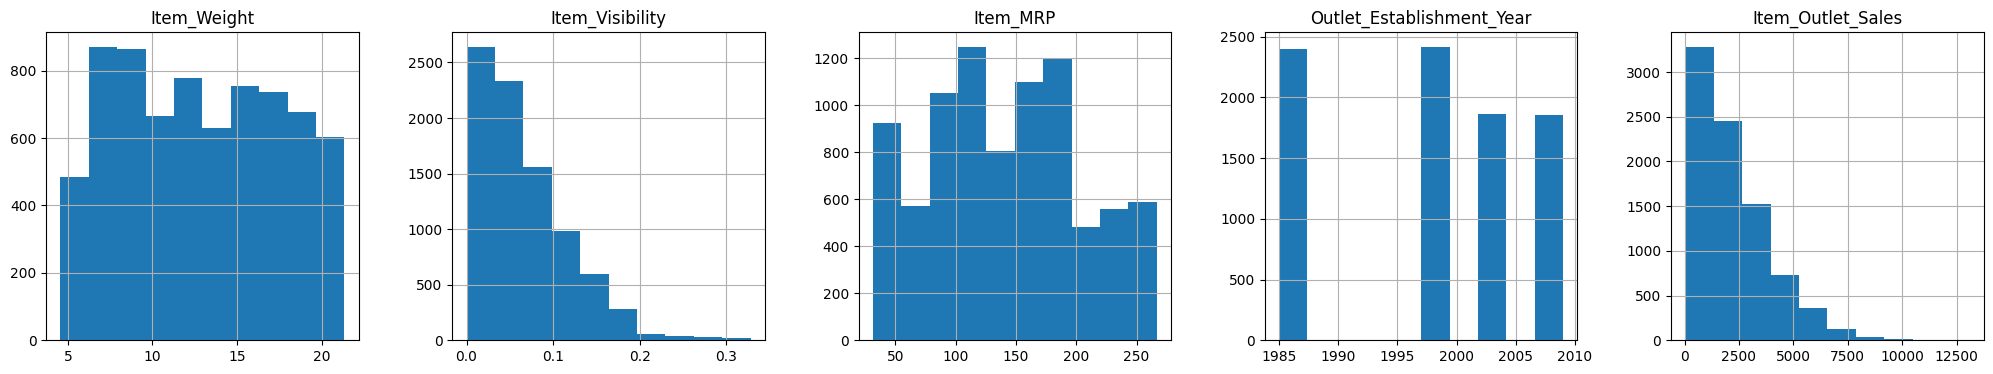

In [91]:
# Histogramas
sales_df.hist(figsize = (25, 4), layout = (1, 5))
plt.show()

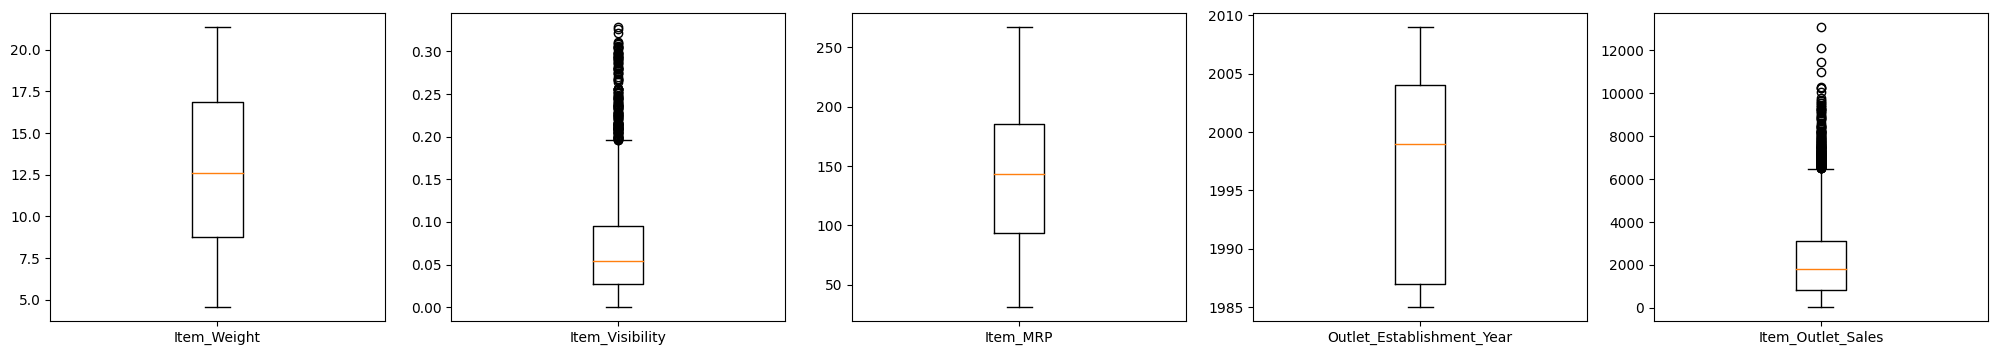

In [92]:
# Boxplots
fig, axes = plt.subplots(1, 5, figsize = (25, 4))
axes = axes.ravel()
for col, ax in zip(sales_df[num_cols], axes):
  ax.boxplot(sales_df[col].dropna(), labels = [f'{col}'])

**Análisis Univariado de Variables Categóricas**

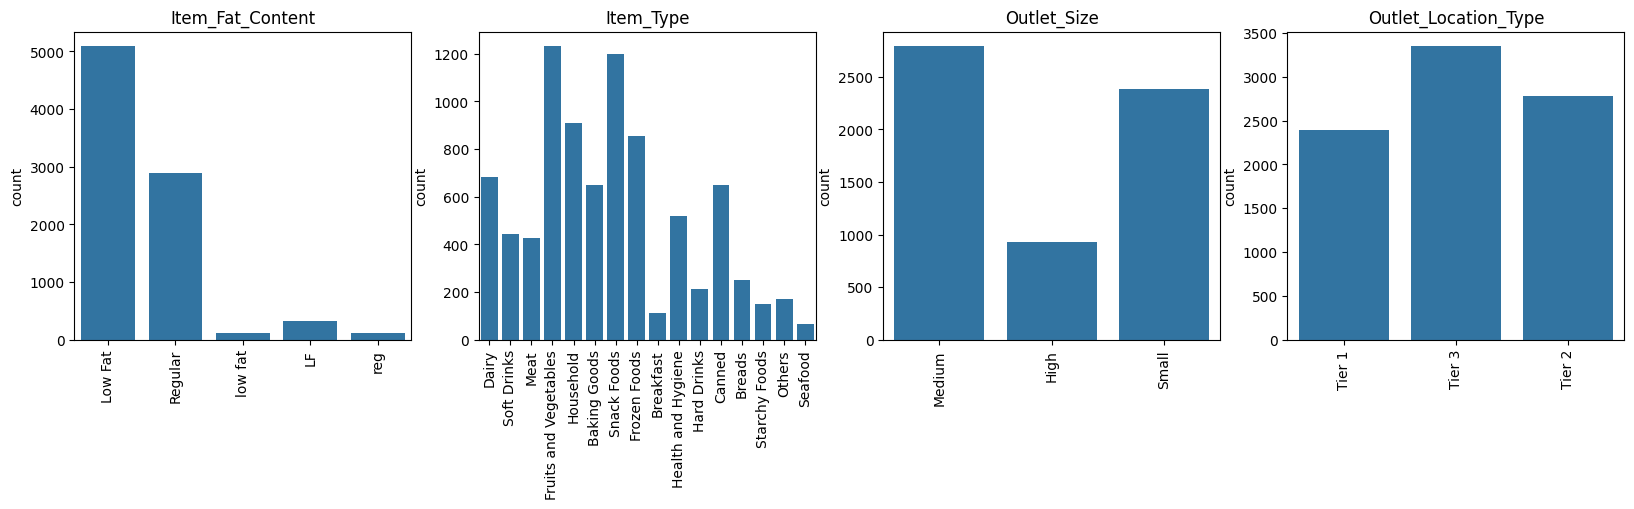

In [93]:
fig, axes = plt.subplots(1,4, figsize = (20,4))
axes = axes.ravel()
for col, ax in zip(sales_df[cat_cols], axes):
  sns.countplot(x = sales_df[col], ax = ax)
  ax.set(title = f'{col}', xlabel = None)
  ax.tick_params(axis = 'x',rotation = 90)

En `Ite_Fat_Content` hay categorías expresadas de diferente forma:
*   Low Fat = low fat = LF
*   Regular = reg

Se unifica, para sólo dejar dos valores: Low Fat y Regular



In [94]:
# Unificar diferentes formas.
sales_df['Item_Fat_Content'] = sales_df['Item_Fat_Content'].apply(lambda x: 'Low Fat' if x == 'low fat' or x == 'LF' else x)
sales_df['Item_Fat_Content'] = sales_df['Item_Fat_Content'].apply(lambda x: 'Regular' if x == 'reg' else x)

<Axes: xlabel='Item_Fat_Content', ylabel='count'>

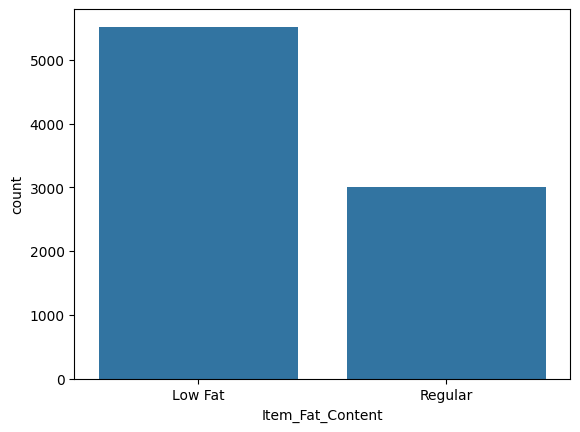

In [95]:
# Gráfico de Barras
sns.countplot(x = sales_df['Item_Fat_Content'])

**Análisis bivariado**

<ipython-input-96-b0ac889a7348>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(round(sales_df.corr(),2), annot = True)


<Axes: >

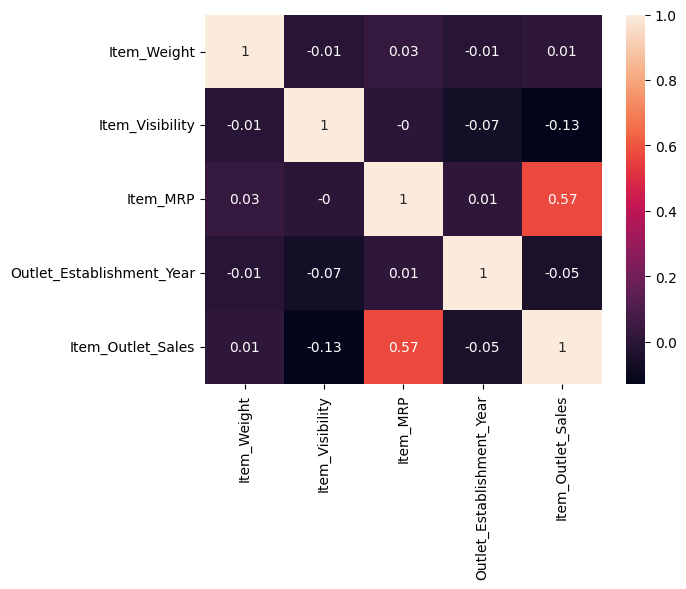

In [96]:
# Mapa de Calor
sns.heatmap(round(sales_df.corr(),2), annot = True)

Del gráfico anterior, solo la variable independiente `Item_MRP` tiene una relación lineal moderada con la variable dependiente `Item_Outlet_Sales`. Se verifica con diagramas de dispersión.

<Axes: xlabel='Item_MRP', ylabel='Item_Outlet_Sales'>

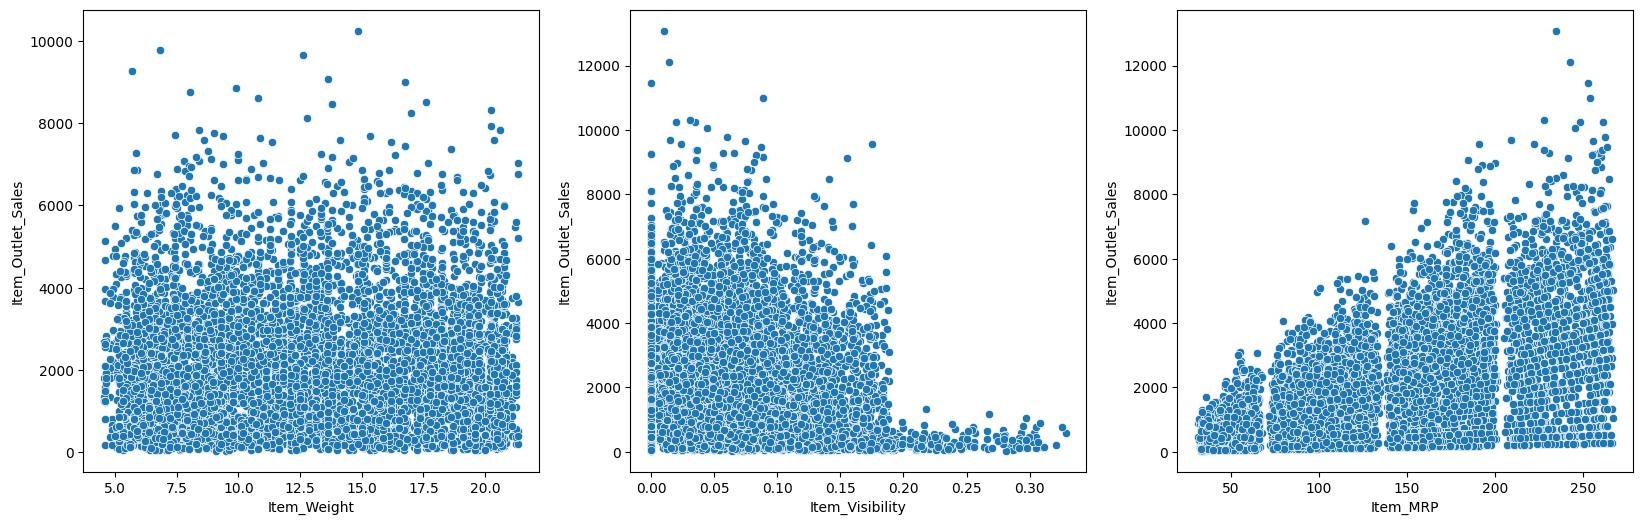

In [97]:
# Diagramas Dispersión
fig, axes = plt.subplots(1, 3, figsize = (20, 6))
sns.scatterplot(x = 'Item_Weight', y = 'Item_Outlet_Sales', data = sales_df, ax = axes[0])
sns.scatterplot(x = 'Item_Visibility', y = 'Item_Outlet_Sales', data = sales_df, ax = axes[1])
sns.scatterplot(x = 'Item_MRP', y = 'Item_Outlet_Sales', data = sales_df, ax = axes[2])

Se crea una nueva característica `Outlet_Age` que indica la antigüedad del outlet.

In [98]:
# Nueva Característica
from datetime import date
sales_df['Outlet_Age'] = date.today().year - sales_df['Outlet_Establishment_Year']
sales_df.drop('Outlet_Establishment_Year', axis = 1, inplace = True)

<Axes: xlabel='Outlet_Age', ylabel='Item_Outlet_Sales'>

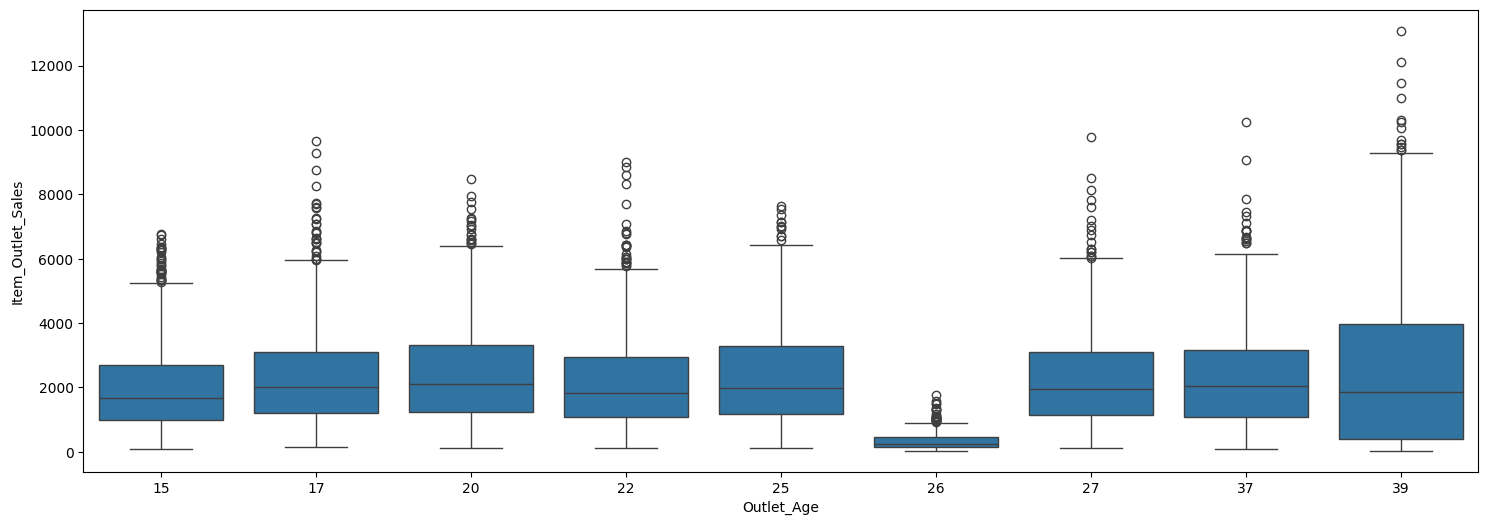

In [99]:
# Boxplots
fig = plt.figure(figsize = (18, 6))
sns.boxplot(x = 'Outlet_Age', y = 'Item_Outlet_Sales', data = sales_df)

**Modelado**

In [100]:
# Se separan las variables del dataframe: en X quedan los predictores y en y la variable de respuesta o salida (Item_Outlet_Sales).
X = sales_df.drop('Item_Outlet_Sales', axis = 1)
y = sales_df['Item_Outlet_Sales']

In [101]:
# Se divide el conjunto en entrenamiento y prueba (80:20)
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, train_size = 0.8, random_state = 1)

In [102]:
# Como se aplicará más de un transformador y de manera diferenciada (numéricas y categóricas reciben diferentes tratamientos),
# se crean pipelines (nombrados como: num_pipeline y cat_pipeline) para transformar las columnas.

# Si sólo fuera un transformador en cada tipo de variable, no sería necesario crer num_pipeline ni cat_pipeline.
# El transformador único podría ir directamente en el ColumnTransformer que aparece abajo.
num_pipeline = make_pipeline(SimpleImputer(strategy = 'median'), MinMaxScaler())
cat_pipeline = make_pipeline(SimpleImputer(strategy = 'most_frequent'), OneHotEncoder(drop = 'first', handle_unknown = 'ignore', sparse_output = False))

preprocessing = ColumnTransformer([
    ('num', num_pipeline, make_column_selector(dtype_include = np.number)),
    ('cat', cat_pipeline, make_column_selector(dtype_include = object))])

In [103]:
# Visualización de los cambios que produce el pipeline "preprocessing" creado anteriormente.
Xtrain_prepared = preprocessing.fit_transform(Xtrain)
Xtrain_prepared_df = pd.DataFrame(Xtrain_prepared, columns = preprocessing.get_feature_names_out(), index = Xtrain.index)
Xtrain_prepared_df

,num__Item_Weight,num__Item_Visibility,num__Item_MRP,num__Outlet_Age,cat__Item_Fat_Content_Regular,cat__Item_Type_Breads,cat__Item_Type_Breakfast,cat__Item_Type_Canned,cat__Item_Type_Dairy,cat__Item_Type_Frozen Foods,...,cat__Item_Type_Snack Foods,cat__Item_Type_Soft Drinks,cat__Item_Type_Starchy Foods,cat__Outlet_Size_Medium,cat__Outlet_Size_Small,cat__Outlet_Location_Type_Tier 2,cat__Outlet_Location_Type_Tier 3,cat__Outlet_Type_Supermarket Type1,cat__Outlet_Type_Supermarket Type2,cat__Outlet_Type_Supermarket Type3
1945,0.821375,0.272069,0.681925,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
1720,0.761834,0.511783,0.615374,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
1954,0.330158,0.164095,0.824788,0.083333,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
1919,0.374814,0.496066,0.312702,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
2461,0.155701,0.181846,0.423207,0.208333,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2895,0.479012,0.844906,0.531008,1.000000,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
7813,0.479012,0.542624,0.100619,1.000000,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
905,0.791605,0.200402,0.500067,0.500000,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
5192,0.300387,0.151094,0.054833,0.458333,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0


In [104]:
# Se crea el pipeline para la predicción, que incluye el de procesamiento creado anteriormente y la regresión lineal.
lr_model = make_pipeline(preprocessing, LinearRegression())
lr_model.fit(Xtrain, ytrain)
predictions = lr_model.predict(Xtest)

print('The Root Mean Square Error (RMSE) is:', mean_squared_error(ytest, predictions, squared = False))
print('The R square (R2) is:', r2_score(ytest, predictions))

The Root Mean Square Error (RMSE) is: 1144.3827848578724
The R square (R2) is: 0.5582080574611583


Lo que seguiría es hacer más transformaciones para mejorar el resultado. Por ejemplo:

* Aplicar una transformación (log, box-cox,...) para hacer que la distribución de `Item_Visibility` tenga una forma más normal, porque está sesgada.

* Usar StandarScaler o RobustScaler en lugar de MinMax.
* Aplicar OrdinalEncoder a algunas categóricas, en lugar de OneHotEncoder.